<a href="https://colab.research.google.com/github/ivillama/capstone/blob/master/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd, numpy as np, requests, sklearn, ast, seaborn as sns, matplotlib.pyplot as plt, urllib.request, json 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from pandas.io.json import json_normalize

In [3]:
response = requests.get("https://data.montgomerycountymd.gov/resource/mmzv-x632.json", stream='True')
print(response.status_code)
print(response.json())



200
[{'report_number': 'MCP3105003T', 'local_case_number': '210011197', 'agency_name': 'Montgomery County Police', 'acrs_report_type': 'Injury Crash', 'crash_date_time': '2021-03-25T12:03:00.000', 'route_type': 'County', 'road_name': 'FATHER HURLEY BLVD', 'cross_street_type': 'County', 'cross_street_name': 'MIDDLEBROOK RD', 'municipality': 'N/A', 'collision_type': 'STRAIGHT MOVEMENT ANGLE', 'weather': 'CLEAR', 'surface_condition': 'DRY', 'light': 'DAYLIGHT', 'traffic_control': 'TRAFFIC SIGNAL', 'driver_substance_abuse': 'NONE DETECTED', 'person_id': 'A256D730-C956-4989-A949-C73BC3BC7F88', 'driver_at_fault': 'Yes', 'injury_severity': 'NO APPARENT INJURY', 'circumstance': 'N/A', 'driver_distracted_by': 'NOT DISTRACTED', 'drivers_license_state': 'MD', 'vehicle_id': 'D4240948-5AC4-4A6A-BFC6-E03C55759DAE', 'vehicle_damage_extent': 'FUNCTIONAL', 'vehicle_first_impact_location': 'ONE OCLOCK', 'vehicle_second_impact_location': 'ONE OCLOCK', 'vehicle_body_type': '(SPORT) UTILITY VEHICLE', 'vehi

In [4]:
URL = "https://data.montgomerycountymd.gov/resource/mmzv-x632.json"
df = pd.read_json(URL)
df.info()
df1 = pd.DataFrame(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   report_number                   1000 non-null   object        
 1   local_case_number               1000 non-null   int64         
 2   agency_name                     1000 non-null   object        
 3   acrs_report_type                1000 non-null   object        
 4   crash_date_time                 1000 non-null   datetime64[ns]
 5   route_type                      908 non-null    object        
 6   road_name                       912 non-null    object        
 7   cross_street_type               908 non-null    object        
 8   cross_street_name               912 non-null    object        
 9   municipality                    912 non-null    object        
 10  collision_type                  1000 non-null   object        
 11  weath

In [5]:
type(df1)
print(df1)


    report_number  ...  non_motorist_substance_abuse
0     MCP3105003T  ...                           NaN
1     MCP3105003T  ...                           NaN
2     MCP284800B0  ...                           NaN
3     MCP284800B0  ...                           NaN
4     MCP3059005V  ...                           NaN
..            ...  ...                           ...
995   MCP32330019  ...                           NaN
996   MCP32330019  ...                           NaN
997   MCP2967004P  ...                           NaN
998   MCP2967004P  ...                           NaN
999   MCP2967004P  ...                           NaN

[1000 rows x 50 columns]


In [6]:
df1.dropna()

print(df1['report_number'])

0      MCP3105003T
1      MCP3105003T
2      MCP284800B0
3      MCP284800B0
4      MCP3059005V
          ...     
995    MCP32330019
996    MCP32330019
997    MCP2967004P
998    MCP2967004P
999    MCP2967004P
Name: report_number, Length: 1000, dtype: object


In [7]:
injurydummies = pd.get_dummies(df1.injury_severity)
print(injurydummies)

df2 = pd.concat([df1,injurydummies], axis = 1)
df2.head()

     NO APPARENT INJURY  ...  SUSPECTED SERIOUS INJURY
0                     1  ...                         0
1                     1  ...                         0
2                     1  ...                         0
3                     1  ...                         0
4                     1  ...                         0
..                  ...  ...                       ...
995                   1  ...                         0
996                   1  ...                         0
997                   1  ...                         0
998                   1  ...                         0
999                   1  ...                         0

[1000 rows x 4 columns]


,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,route_type,road_name,cross_street_type,cross_street_name,municipality,collision_type,weather,surface_condition,light,traffic_control,driver_substance_abuse,person_id,driver_at_fault,injury_severity,circumstance,driver_distracted_by,drivers_license_state,vehicle_id,vehicle_damage_extent,vehicle_first_impact_location,vehicle_second_impact_location,vehicle_body_type,vehicle_movement,vehicle_continuing_dir,vehicle_going_dir,speed_limit,driverless_vehicle,parked_vehicle,:@computed_region_a9cs_3ed7,vehicle_year,:@computed_region_r648_kzwt,vehicle_make,:@computed_region_vu5j_pcmz,vehicle_model,:@computed_region_tx5f_5em3,equipment_problems,latitude,:@computed_region_kbsp_ykn9,:@computed_region_d7bw_bq6x,longitude,:@computed_region_rbt8_3x7n,geolocation,off_road_description,related_non_motorist,non_motorist_substance_abuse,NO APPARENT INJURY,POSSIBLE INJURY,SUSPECTED MINOR INJURY,SUSPECTED SERIOUS INJURY
0,MCP3105003T,210011197,Montgomery County Police,Injury Crash,2021-03-25 12:03:00,County,FATHER HURLEY BLVD,County,MIDDLEBROOK RD,N/A,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,55296903-8D9C-4927-A6F6-78B4B97973CC,No,NO APPARENT INJURY,N/A,NOT DISTRACTED,MD,33BBAD09-C807-41EA-B261-C810F9EB5B7E,FUNCTIONAL,TWELVE OCLOCK,TWELVE OCLOCK,(SPORT) UTILITY VEHICLE,STARTING FROM LANE,West,West,40,No,No,2.0,2014,5.0,CHEV,2.0,TK,2.0,NO MISUSE,39.184409,39.0,39,-77.273963,1.0,"{'latitude': '39.18440933', 'longitude': '-77....",NaN,NaN,NaN,1,0,0,0
1,MCP3105003T,210011197,Montgomery County Police,Injury Crash,2021-03-25 12:03:00,County,FATHER HURLEY BLVD,County,MIDDLEBROOK RD,N/A,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,A256D730-C956-4989-A949-C73BC3BC7F88,Yes,NO APPARENT INJURY,N/A,NOT DISTRACTED,MD,D4240948-5AC4-4A6A-BFC6-E03C55759DAE,FUNCTIONAL,ONE OCLOCK,ONE OCLOCK,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,North,East,40,No,No,2.0,2008,5.0,HOND,2.0,TK,2.0,NO MISUSE,39.184409,39.0,39,-77.273963,1.0,"{'latitude': '39.18440933', 'longitude': '-77....",NaN,NaN,NaN,1,0,0,0
2,MCP284800B0,210011178,Montgomery County Police,Property Damage Crash,2021-03-25 09:25:00,Maryland (State),ROCKVILLE PIKE,County,FLANDERS AVE,N/A,STRAIGHT MOVEMENT ANGLE,CLOUDY,WET,DAYLIGHT,STOP SIGN,NONE DETECTED,C2AFF3A4-3419-41C8-BC27-53E87D32AE5D,Yes,NO APPARENT INJURY,N/A,LOOKED BUT DID NOT SEE,MD,130023B1-26F7-4436-AB6A-8AF0D184A0B2,DISABLING,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,ENTERING TRAFFIC LANE,South,South,40,No,No,1.0,2016,3.0,NISSAN,1.0,SENTRA,1.0,NO MISUSE,39.038355,19.0,60,-77.109015,1.0,"{'latitude': '39.038355', 'longitude': '-77.10...",NaN,NaN,NaN,1,0,0,0
3,MCP284800B0,210011178,Montgomery County Police,Property Damage Crash,2021-03-25 09:25:00,Maryland (State),ROCKVILLE PIKE,County,FLANDERS AVE,N/A,STRAIGHT MOVEMENT ANGLE,CLOUDY,WET,DAYLIGHT,STOP SIGN,NONE DETECTED,3C4F9027-7CDB-4803-A9EE-05E16C56E564,No,NO APPARENT INJURY,N/A,NOT DISTRACTED,VA,E16E9879-9C42-405B-8BFC-6491D58A9909,DISABLING,TEN OCLOCK,TEN OCLOCK,PASSENGER CAR,MOVING CONSTANT SPEED,South,South,40,No,No,1.0,2006,3.0,HONDA,1.0,ODYSSEY,1.0,NO MISUSE,39.038355,19.0,60,-77.109015,1.0,"{'latitude': '39.038355', 'longitude': '-77.10...",NaN,NaN,NaN,1,0,0,0
4,MCP3059005V,210011142,Montgomery County Police,Property Damage Crash,2021-03-24 21:54:00,County,MIDDLEBROOK RD,Maryland (State),FREDERICK RD,N/A,OTHER,FOGGY,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,ALCOHOL PRESENT,70ED1E02-F6E8-4274-94B8-8C3E2A6C6321,Yes,NO APPARENT INJURY,"V WIPERS|W OTHER ENVIRONMENTAL, WET",UNKNOWN,MD,C6C36EA3-E93E-478E-A798-22FFB52A68B0,DESTROYED,TWELVE OCLOCK,TWELVE OCLOCK,PASSENGER CAR,MAKING RIGHT TURN,East,East,40,No,No,2.0,2008,5.0,NISSAN,2.0,ALTIMA,2.0,NO MISUSE,39.180904,39.0,36,-77.238426,1.0,"{'latitude': '39.18090385', 'longitude': '-77....",NaN,NaN,NaN,1,0,0,0


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing

# Logistic Regression - No Apparent Injury by Speed Limit


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   report_number                   1000 non-null   object        
 1   local_case_number               1000 non-null   int64         
 2   agency_name                     1000 non-null   object        
 3   acrs_report_type                1000 non-null   object        
 4   crash_date_time                 1000 non-null   datetime64[ns]
 5   route_type                      908 non-null    object        
 6   road_name                       912 non-null    object        
 7   cross_street_type               908 non-null    object        
 8   cross_street_name               912 non-null    object        
 9   municipality                    912 non-null    object        
 10  collision_type                  1000 non-null   object        
 11  weath

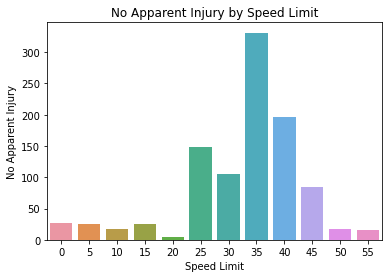

In [22]:
df2.info()

df2.speed_limit.value_counts()

sns.countplot(x = df2.speed_limit)
plt.title('No Apparent Injury by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('No Apparent Injury')

x1 = df2.speed_limit.values.reshape(-1,1)
y1 = df2.iloc[:,51]


#splitting data into training and testing data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size = 0.50, random_state = 42)


In [23]:
#Instantiate Logistic Regression
LogReg = LogisticRegression(max_iter = 500)

In [24]:
#Preprocessing using standard scalar
scal = preprocessing.StandardScaler()
x1_train = scal.fit_transform(x1_train)
x1_test = scal.transform(x1_test)

In [25]:
#Fitted to the training data
LogReg.fit(x1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Prediction Using Logistic Regression - No Apparent Injury by Speed Limit

In [26]:
#Outcome Prediction on x1_test, 0 (No Apparent Injury) and 1 (Apparent Injury)
y1_pred = LogReg.predict(x1_test)
y1_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
#Prediction Probability of 0 (No Apparent Injury) and 1 (Apparent Injury)
y1_pred_proba = LogReg.predict_proba(x1_test)
y1_pred_proba

array([[0.94142982, 0.05857018],
       [0.98108922, 0.01891078],
       [0.90957621, 0.09042379],
       [0.96252467, 0.03747533],
       [0.88836221, 0.11163779],
       [0.90957621, 0.09042379],
       [0.90957621, 0.09042379],
       [0.88836221, 0.11163779],
       [0.94142982, 0.05857018],
       [0.96252467, 0.03747533],
       [0.94142982, 0.05857018],
       [0.88836221, 0.11163779],
       [0.92708986, 0.07291014],
       [0.92708986, 0.07291014],
       [0.92708986, 0.07291014],
       [0.92708986, 0.07291014],
       [0.94142982, 0.05857018],
       [0.90957621, 0.09042379],
       [0.90957621, 0.09042379],
       [0.7975523 , 0.2024477 ],
       [0.97621388, 0.02378612],
       [0.90957621, 0.09042379],
       [0.94142982, 0.05857018],
       [0.98108922, 0.01891078],
       [0.88836221, 0.11163779],
       [0.90957621, 0.09042379],
       [0.94142982, 0.05857018],
       [0.88836221, 0.11163779],
       [0.86292134, 0.13707866],
       [0.94142982, 0.05857018],
       [0.

In [28]:
#For the first iteration in the x1_test data, the logistic regression model
#predicts that there is a ~90% chance there will be no apparent injury and a ~10% chance there is an apparent injury
y1_pred_proba[0]

array([0.94142982, 0.05857018])

In [29]:
x1_test[0] 

array([-0.75664134])

In [ ]:
df2 = pd.read_csv('mdotaadt.csv', dtype=object)
df2.head()


,X,Y,OBJECTID,LOCATION_ID,COUNTY_ID,COUNTY_DESC,MUN_SORT,MUNICIPALITY,ROADNAME,ID_PREFIX,ID_RTE_NO,MP_SUFFIX,ID_MP,BEGIN_SECTION,END_SECTION,STATION_DESC,ROAD_SECTION,RURAL_URBAN,F_SYSTEM,F_SYSTEM_DESC,ROUTEID,ROUTEID_RH,MAIN_LINE,PEAK_HOUR_DIRECTION,NUM_LANES,COUNTED_FACTORED,STMP_SEQ,K_FACTOR,D_FACTOR,NORTH_EAST_SPLIT,SOUTH_WEST_SPLIT,AVMT,LINK,AADT_2010,AADT_2011,AADT_2012,AADT_2013,AADT_2014,AADT_2015,AADT_2016,...,MCYCLE_AADT_PCT_OVERALL,CAR_AADT_PCT_OVERALL,LIGHT_TRUCK_AADT_PCT_OVERALL,BUS_AADT_PCT_OVERALL,SUTRUCK_AADT_PCT_OVERALL,CUTRUCK_AADT_PCT_OVERALL,TRUCK_AADT_PCT_OVERALL,NUM_LANES_ANNO,K_FACTOR_ANNO,D_FACTOR_ANNO,NORTH_EAST_SPLIT_ANNO,SOUTH_WEST_SPLIT_ANNO,AADT_2010_ANNO,AADT_2011_ANNO,AADT_2012_ANNO,AADT_2013_ANNO,AADT_2014_ANNO,AADT_2015_ANNO,AADT_2016_ANNO,AADT_2017_ANNO,AADT_2018_ANNO,AADT_ANNO,AAWDT_2010_ANNO,AAWDT_2011_ANNO,AAWDT_2012_ANNO,AAWDT_2013_ANNO,AAWDT_2014_ANNO,AAWDT_2015_ANNO,AAWDT_2016_ANNO,AAWDT_2017_ANNO,AAWDT_2018_ANNO,AAWDT_ANNO,MOTORCYCLE_AADT_ANNO,CAR_AADT_ANNO,BUS_AADT_ANNO,LIGHT_TRUCK_AADT_ANNO,SINGLE_UNIT_AADT_ANNO,COMBINATION_UNIT_AADT_ANNO,TRUCK_AADT_ANNO,ID_PREFIX_NAME
0,-8533742.1435,4784320.6852,1,S2009030042,3,Baltimore,0,None,Timonium Rd,CO,798,,1.88,1.34,1.98,Timonium Rd - .10 Mile East Of Mays Chapel Rd,Jenifer Rd To Mays Chapel Rd,Urban,5,Major Collector,03000CO00798 01WW**************,03000CO00798--1-----,1,East,2,F,0,11.01,63.61,56.93,43.07,0.8629,https://maps.roads.maryland.gov/itms_public/?s...,3481,3502,3473,3484,3475,3560,3631,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,11.01,63.61,56.93,43.07,"3,481","3,502","3,473","3,484","3,475","3,560","3,631","3,722","3,693","3,694","3,731","3,782","3,753","3,764","3,725","3,810","3,891","3,952","3,923","4,064",NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO
1,-8514936.5869,4719225.7214,2,B0740,2,Anne Arundel,0,None,King George St,MD,450,,12.88,12.46,13.42,Md450-.10 Mi W Of College Ave,Main St To Md 435,Urban,4,Minor Arterial,02000MD00450 01EE**************,02000MD00450--1-----,1,East,2,F,2,7.36,68.52,48.39,51.61,3.6305,https://maps.roads.maryland.gov/itms_public/?s...,10991,11042,10390,10411,10382,9710,9891,...,0.00357108387221311,0.893543094295917,0.085030402470804,0.0029919891902326,0.0140913039281923,0.000772126242640672,0.0148634301708329,2,7.36,68.52,48.39,51.61,"10,991","11,042","10,390","10,411","10,382","9,710","9,891","10,132","10,360","10,361","11,761","11,932","11,220","11,241","11,112","10,390","10,581","10,842","11,090","10,981",37,"9,258",31,881,146,8,154,MD
2,-8570494.6832,4653970.1975,3,B1761,8,Charles,0,None,Port Tobacco Rd,MD,6,,24.75,22.95,25.21,Md6-.60 Mi W Of Us301,Chapel Point Rd To Us 301,Rural,5,Major Collector,08000MD00006 01EE**************,08000MD00006--1-----,1,West,2,F,1,8.99,51.54,50.08,49.92,8.2597,https://maps.roads.maryland.gov/itms_public/?s...,9740,9781,9702,9723,9694,9955,9860,...,0.00239688405073405,0.690602217117747,0.226705283131929,0.0111854589034255,0.0576250873863977,0.0114850694097673,0.069110156796165,2,8.99,51.54,50.08,49.92,"9,740","9,781","9,702","9,723","9,694","9,955","9,860","10,101","10,012","10,013","10,420","10,561","10,482","10,503","10,374","10,655","10,550","10,811","10,712","10,613",24,"6,915",112,"2,270",577,115,692,MD
3,-8542958.3353,4766529.9186,4,S1999030111,3,Baltimore,0,None,Ramp 3 Fr Md 122 Eb To Ramp 2 (to Is695),RP,695,,0.02,0,0.05,Exit 17 Ramp 3 Fr Md 122 Eb To Ramp 2 (to Is 6...,Exit 17 Ramp 03 Security Blvd To Ramp 2 Fr Md ...,Urban,1,Interstate,03000RP00695 02NNIS17 03,03000RP00695--101703,2,North,1,F,0,10.46,100,100,0,0.1155,https://maps.roads.maryland.gov/itms_public/?s...,NaN,NaN,5240,5291,5292,5423,4880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10.46,100,100,0,NaN,NaN,"5,240","5,291","5,292","5,423","4,880","5,001","6,290","6,331",NaN,NaN,"5,550","5,611","5,562","5,693","5,120","5,201","6,540","6,581",NaN,NaN,NaN,NaN,NaN,NaN,NaN,RP
4,-8520413.1814,4779663.9938,5,S2012030129,3,Baltimore,0,None,Waltham Woods Rd,CO,3534,,0.42,0,0.46,Waltham Woods Rd - Between Md 41 & Cider Mill Rd,Joppa Rd To Md 

In [ ]:
type(df2)
print(df2)

                                    error
code                                  500
details                                []
message  Error performing query operation
